# EDA simple project

## Preparations

In [874]:
# import all libraries/packages
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for geo plotting
import plotly.express as px
import altair as alt
from vega_datasets import data


# from matplotlib.ticker import PercentFormatter
# plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
# plt.rcParams["figure.facecolor"]= "w"
# pd.plotting.register_matplotlib_converters()
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [875]:
# import dataset
df = pd.read_csv('data/King_County_House_prices_dataset.csv')

## Understand the data

In [876]:
# print out the shape and the head of the dataset
print(df.shape)
df.head(2)

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [877]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Quickly check each column, following clean up processes need to be done. ()

  Data Types:
| Column name   | Clean up |  Description |
| ---           | ---      | ----------- |
| id            | Drop            | unique identified for a house|
| date          | change to data type| house was sold |
| price         | drop the digits behind, set to int| is prediction target |
| bedrooms      | OK |  |
| bathrooms     | OK|  |
| sqft_living   |  |  |
| sqft_lot      |   | |
| floors        | round to 1 digit | values are array([1. , 2. , 1.5, 3. , 2.5, 3.5]) |
| waterfront    | Drop | House which has a view to a waterfront |
| view          |  | |
| conditions    |  | How good the condition is ( Overall ) |
| grade         |  | overall grade given to the housing unit, based on King County grading system |
| sqft_above    |  | square footage of house apart from basement |
| sqft_basement | str->int type, some values need to be replaced | square footage of the basement |
| yr_built      | change to year |  |
| yr_renovated  | clean up |  |
| zipcode       | OK |  |
| lat           | OK |  |
| long          | OK | |
| sqft_living15 | interesting | The square footage of interior housing living space for the nearest 15 neighbors |
| sqft_lot15    | interesting | The square footage of the land lots of the nearest 15 neighbors |

- Object: `date` needs to be transferred to Date, `sqft_basement` -> int64
- float64: 
- Date type: `date`, `yr_built`,`yr_renovated`
- There are NO duplicated rows found

# Data cleansing

## Drop irrelevant columns

In [878]:
'''Drop columns not needed
view: only about 10% houses are viewed, so it is not really representative regarding popularity 
'''
df = df.drop(['waterfront'], axis=1)

## Data type and transforming

**Date entry**: `date` and `yr_built` `yr_renovated`

In [879]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [880]:
# find out NaN value in renovated year
pd.isna(df.yr_renovated).value_counts()

False    17755
True      3842
Name: yr_renovated, dtype: int64

In [881]:
# find out how many houses are not renovated
df.query('yr_renovated==0').date.count()

17011

In [882]:
# Change date to date type
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y').dt.year

For renovation year, because there are NaN and 0 data, we use `errors='ignore'` to solve the issue

In [883]:
# for year in df.yr_renovated, be
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'], format='%Y.0', errors='ignore')

Casting to int

In [884]:
# casting price  to int so long there is no missing value
df.price = df.price.astype(int)


Col `floors`

In [885]:
df.floors.unique()
df.floors.dtype

dtype('float64')

In [886]:
df.floors = df.floors.round(2)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,None,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


Change `grade` and `condition` as categorical type

In [887]:
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')

`sqft_basement` is `str`type, find out special characters contained inside and transform it to int

In [888]:
# df.sqft_basement.astype(float, errors="ignore")
df.sqft_basement = df.sqft_basement.str.replace('?', '0')

In [889]:
# change type to float and then to int
df.sqft_basement = df.sqft_basement.astype(float)
df.sqft_basement = df.sqft_basement.astype(int)
df.sqft_basement.dtype

dtype('int64')

### Handling Missing Data

In [890]:
# check results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  int64         
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   view           21534 non-null  float64       
 9   condition      21597 non-null  category      
 10  grade          21597 non-null  category      
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  object        
 15  zipcode        2159

# First glance at data

Housing price distribution

In [892]:
print(df[['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15']].describe(percentiles=[.1, .5, .75]))
a = df['price'].median()
print(f'median value is: {a}')
print(f'the skewness of price is {df.price.skew(axis=0)}')

              price   sqft_living      sqft_lot  sqft_living15     sqft_lot15
count  2.159700e+04  21597.000000  2.159700e+04   21597.000000   21597.000000
mean   5.402966e+05   2080.321850  1.509941e+04    1986.620318   12758.283512
std    3.673681e+05    918.106125  4.141264e+04     685.230472   27274.441950
min    7.800000e+04    370.000000  5.200000e+02     399.000000     651.000000
10%    2.450000e+05   1090.000000  3.322600e+03    1258.400000    3667.800000
50%    4.500000e+05   1910.000000  7.618000e+03    1840.000000    7620.000000
75%    6.450000e+05   2550.000000  1.068500e+04    2360.000000   10083.000000
max    7.700000e+06  13540.000000  1.651359e+06    6210.000000  871200.000000
median value is: 450000.0
the skewness of price is 4.023364652271239


In [893]:
df_price50 = df[df.price<df.price.describe()['50%']]
zip_chp = df_price50.zipcode.nunique()

df_price50.price.describe()

count     10679.000000
mean     316938.837063
std       78825.709849
min       78000.000000
25%      257600.000000
50%      320000.000000
75%      381328.000000
max      449999.000000
Name: price, dtype: float64

Text(16.497496141975304, 0.5, 'Number')

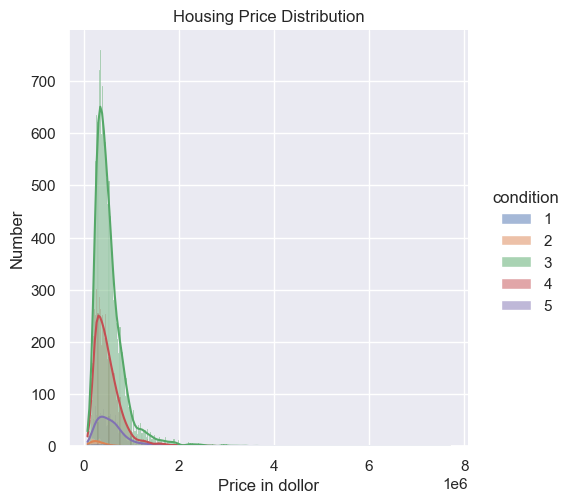

In [894]:
# f, ax = plt.subplots(figsize=(7, 6))

sns.displot(data=df, x="price", kde=True, hue='condition')

plt.title('Housing Price Distribution')
plt.xlabel('Price in dollor')
plt.ylabel('Number')
# plt.xlim((0,2555555))
# plt.ylim((0,50))

- Seems that condition 3 has higher mean price

Exam numerical data distribution
- Set a list of all types of our data in the dataset and only take the numerical one
- Plot the distribution

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>],
       [<AxesSubplot: title={'center': 'sqft_living'}>,
        <AxesSubplot: title={'center': 'sqft_lot'}>,
        <AxesSubplot: title={'center': 'floors'}>,
        <AxesSubplot: title={'center': 'view'}>],
       [<AxesSubplot: title={'center': 'sqft_above'}>,
        <AxesSubplot: title={'center': 'sqft_basement'}>,
        <AxesSubplot: title={'center': 'yr_built'}>,
        <AxesSubplot: title={'center': 'zipcode'}>],
       [<AxesSubplot: title={'center': 'lat'}>,
        <AxesSubplot: title={'center': 'long'}>,
        <AxesSubplot: title={'center': 'sqft_living15'}>,
        <AxesSubplot: title={'center': 'sqft_lot15'}>]], dtype=object)

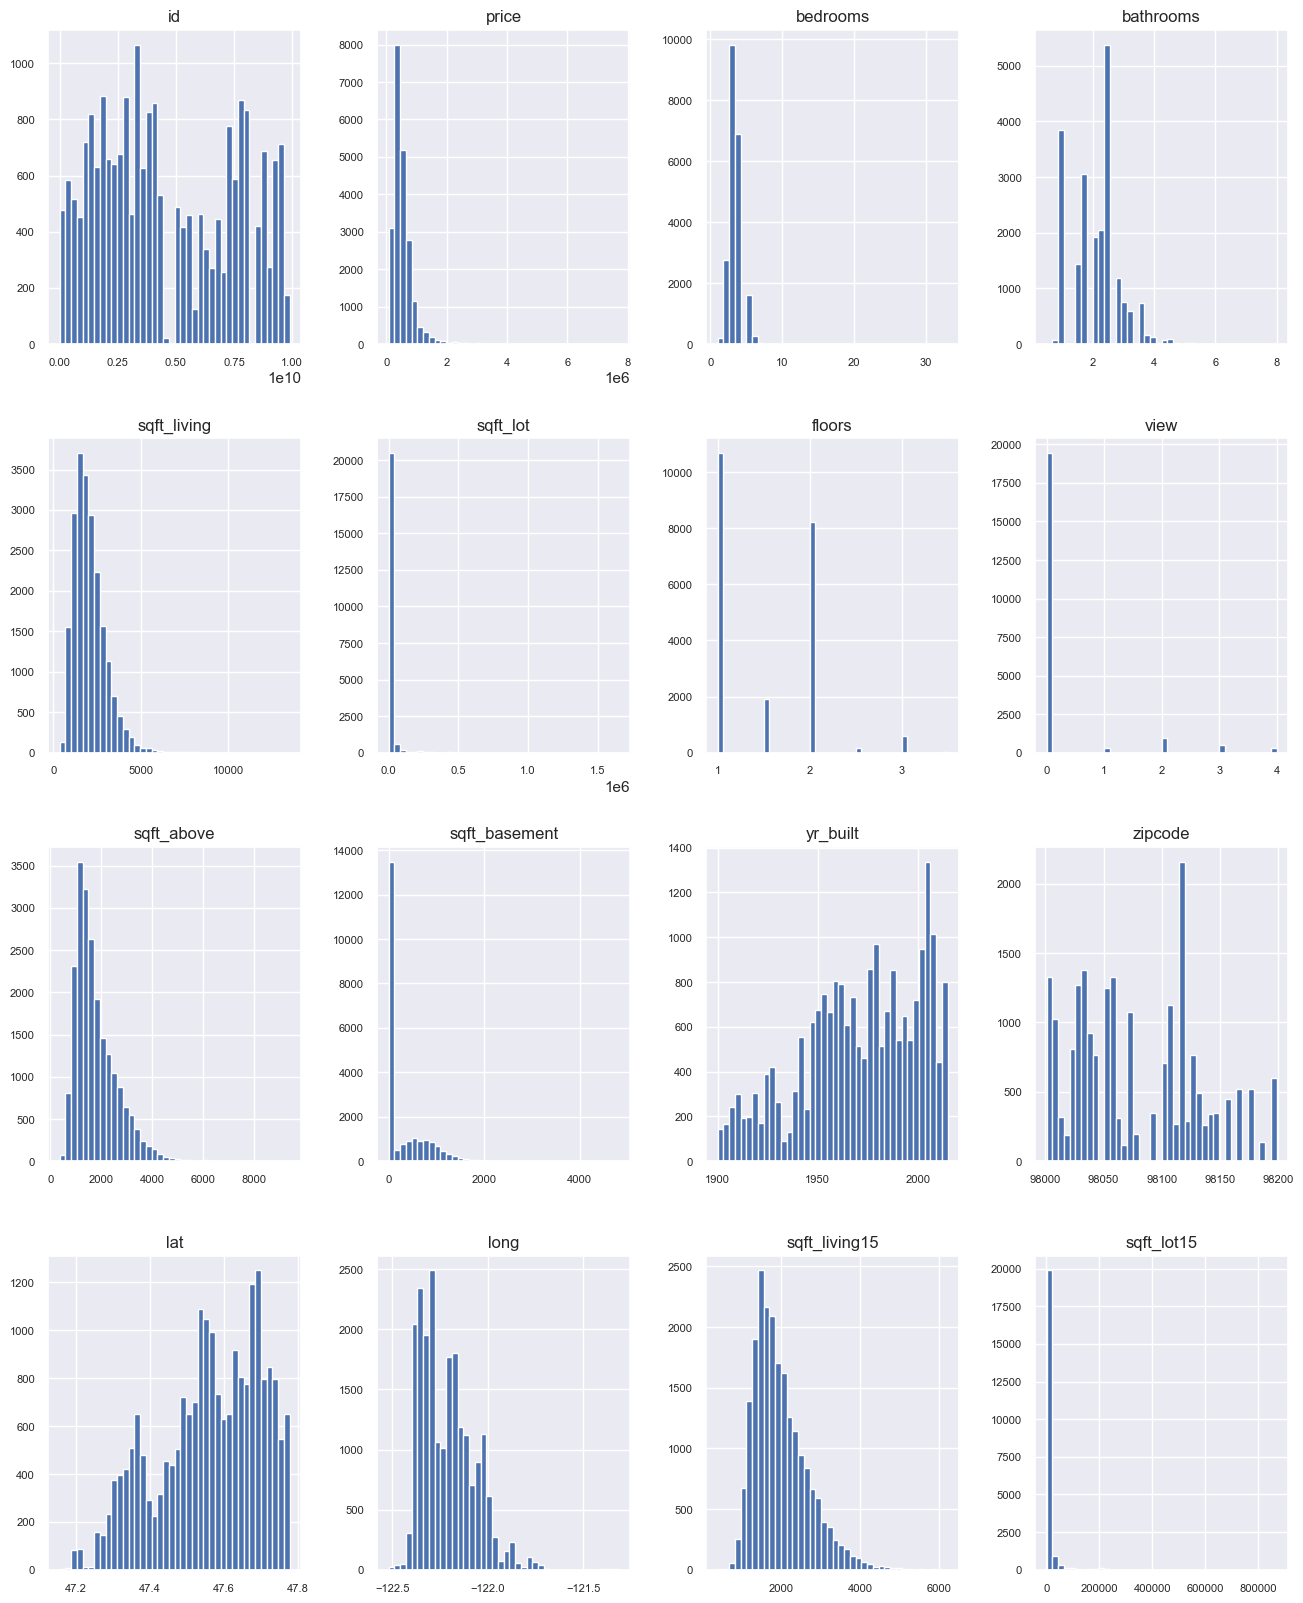

In [895]:
list(set(df.dtypes.tolist()))

df_num = df.select_dtypes(include=['float64','int64'])
df_num.head()

df_num.hist(figsize=(16, 20), bins=40, xlabelsize=8, ylabelsize=8)

Text(0, 0.5, 'House price in dollor')

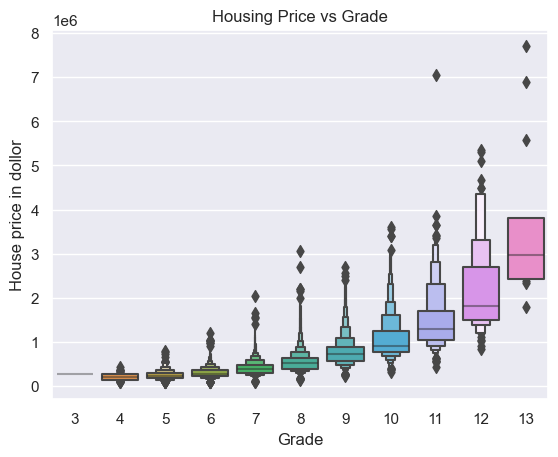

In [896]:
# find if the grade is a indicator for housing price
sns.boxenplot(df, x='grade', y='price')

plt.title('Housing Price vs Grade')
plt.xlabel('Grade')
plt.ylabel('House price in dollor')

Bedroom number, living area size, sqft_living15 seems to have correlation with `price`

In [897]:
# calculate the correlation with price
df_num_corr = df_num.corr()['price'][1:]
df_num_corr

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
view             0.395734
sqft_above       0.605368
sqft_basement    0.321108
yr_built         0.053953
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

In [898]:
df['sold_year'] = df['date'].dt.year
df['sold_month'] = df['date'].dt.month.astype('category')

df.sold_month.head()

0    10
1    12
2     2
3    12
4     2
Name: sold_month, dtype: category
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

- Strongest is with `sqft_living`
- Meaning housing price does not only depend on one factor.
- Next step is to check the location of the houses

## Data analysis Based on Hypothesis

## Hypothesis1: does it worth to invest, and invest low budget housing?

### To answer this question, we need to understand what is low budget housing
- lower than median value. Price data is highly skewed (skewness=4.02)
- Find areas (zip codes) have cheaper housing. set lowest `n` price value
  
  save new dataframe `df_chip_area` for lower priced houses

In [899]:
# focus on the lower 50% percentile, excluded two zip code
df_price50 = df[df.price<df.price.describe()['50%']]
num_zip = df_price50.zipcode.nunique()
print(f'there are {num_zip} zip codes in the lower 50 percentile of housing price')

# defind lowest n mean value of houses, 68 zip code
n = 30

# Find out the lowest housing price area according to the zipcode
zip_chp = df_price50.groupby('zipcode').price.mean().nsmallest(n).index

# filter out the dataset of the area
df_chp_area = df_price50[df_price50.zipcode.isin(zip_chp)]
print(df_chp_area.shape)
df_chp_area.describe()

there are 68 zip codes in the lower 50 percentile of housing price
(7113, 22)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sold_year
count,7.113000e+03,7113.000000,7113.000000,7113.000000,7113.000000,7.113000e+03,7113.000000,7092.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000
mean,4.497301e+09,290623.071278,3.250387,1.864087,1708.667932,1.282092e+04,1.342190,0.083474,1514.598200,190.212850,1971.479123,98075.311402,47.425542,-122.215578,1711.405736,11578.916069,2014.341206
std,2.829016e+09,74172.257188,0.817850,0.647966,580.075502,3.038468e+04,0.459344,0.440283,549.639526,342.218138,25.305766,60.179007,0.116106,0.135222,464.763671,22255.454665,0.474148
min,1.000102e+06,78000.000000,1.000000,0.500000,380.000000,5.720000e+02,1.000000,0.000000,380.000000,0.000000,1900.000000,98001.000000,47.155900,-122.512000,700.000000,651.000000,2014.000000
25%,2.111010e+09,239000.000000,3.000000,1.000000,1270.000000,6.074000e+03,1.000000,0.000000,1100.000000,0.000000,1955.000000,98030.000000,47.343400,-122.316000,1360.000000,6147.000000,2014.000000
50%,3.832050e+09,287000.000000,3.000000,1.750000,1660.000000,7.920000e+03,1.000000,0.000000,1390.000000,0.000000,1971.000000,98055.000000,47.411700,-122.244000,1650.000000,7866.000000,2014.000000
75%,7.299601e+09,344500.000000,4.000000,2.500000,2090.000000,1.002600e+04,2.000000,0.000000,1830.000000,310.000000,1991.000000,98118.000000,47.497700,-122.162000,2010.000000,9611.000000,2015.000000
max,9.900000e+09,449999.000000,8.000000,5.250000,4340.000000,1.164794e+06,3.000000,4.000000,3880.000000,2030.000000,2015.000000,98198.000000,47.777200,-121.315000,4362.000000,392040.000000,2015.000000


Find out duplicated `id` data in the dataset, we consider they are sold twice in a year.
- Is the latest sold with profit margin?

dataframe: `df_sort_dup`

In [951]:
# First sort the data according to sold date
df_sort = df.sort_values(by='date')

#all duplicated id
dup_id = df_sort[df_sort['id'].duplicated(keep=False)].id 

#dataframe contains first(earlier) and last(latest) duplicated rows
df_sort_dup = df_sort[df_sort['id'].duplicated(keep="last")].reset_index(drop=True)
df_sort_dup_last = df_sort[df_sort['id'].duplicated()].rename(columns={'price':'last_sold_price','date':'last_sold_date'}).reset_index(drop=True)

df_sort_dup = pd.concat([df_sort_dup, df_sort_dup_last[['last_sold_price','last_sold_date']]],axis=1)
df_sort_dup['price_diff'] = df_sort_dup['last_sold_price'] - df_sort_dup['price']
df_sort_dup['time_diff'] = df_sort_dup['last_sold_date'] - df_sort_dup['date']
df_sort_dup['month_sold1'] = df_sort_dup["date"].dt.month
df_sort_dup['month_sold2'] = df_sort_dup["last_sold_date"].dt.month

df_sort_dup
df_sort_dup.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,...,lat,long,sqft_living15,sqft_lot15,sold_year,last_sold_price,price_diff,time_diff,month_sold1,month_sold2
count,1.770000e+02,1.770000e+02,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,...,177.000000,177.000000,177.000000,177.000000,177.000000,1.770000e+02,1.770000e+02,177,177.000000,177.000000
mean,4.524131e+09,3.509226e+05,3.282486,1.800847,1740.169492,11634.785311,1.265537,0.135593,1477.175141,259.039548,...,47.547471,-122.238045,1773.175141,10648.395480,2014.045198,4.867187e+05,1.357961e+05,182 days 07:11:11.186440678,7.779661,4.593220
std,2.881247e+09,2.871862e+05,1.027673,0.737268,757.224653,22800.400149,0.433142,0.660345,634.520164,416.100244,...,0.133713,0.130511,612.264331,16445.693191,0.208327,2.871202e+05,4.050726e+05,29 days 06:43:21.150404022,2.484505,3.344527
min,1.000102e+06,8.200000e+04,1.000000,0.750000,580.000000,1092.000000,1.000000,0.000000,580.000000,0.000000,...,47.272900,-122.463000,810.000000,1334.000000,2014.000000,1.240000e+05,-1.350000e+06,76 days 00:00:00,1.000000,1.000000
25%,1.974300e+09,1.800000e+05,3.000000,1.000000,1220.000000,5546.000000,1.000000,0.000000,1050.000000,0.000000,...,47.460800,-122.337000,1360.000000,6000.000000,2014.000000,3.000000e+05,-3.000000e+04,175 days 00:00:00,6.000000,2.000000
50%,4.031001e+09,2.600000e+05,3.000000,1.750000,1600.000000,7980.000000,1.000000,0.000000,1290.000000,0.000000,...,47.542700,-122.284000,1610.000000,7920.000000,2014.000000,4.199500e+05,1.420000e+05,188 days 00:00:00,8.000000,4.000000
75%,7.409700e+09,4.100000e+05,4.000000,2.250000,2080.000000,10080.000000,1.500000,0.000000,1720.000000,500.000000,...,47.673600,-122.172000,2020.000000,9572.000000,2014.000000,5.850000e+05,3.326750e+05,203 days 00:00:00,10.000000,5.000000
max,9.834201e+09,1.900000e+06,6.000000,4.500000,5290.000000,224442.000000,3.000000,4.000000,4540.000000,2330.000000,...,47.773700,-121.734000,4060.000000,183897.000000,2015.000000,1.940000e+06,1.540000e+06,219 days 00:00:00,12.000000,12.000000


To Do: Find out duplicated `lat` and `long` rows, it also means potential sold multiple times in a year

In [901]:
# # check duplicated data
# idx2 = df[df[['lat','long','zipcode','sqft_lot','sqft_living']].duplicated(keep=False)].index

# idx_dup_loc = [i for i in idx2 if i not in idx1] #find out same geo location, but not same id houses

# df.iloc[idx_dup_loc].sort_values(by=['lat'])[['lat','long','date','price','yr_built']]
# # df_dup_loc = df[(df.lat.isin(dup_loc)) & (df.long.isin(df[df[['lat','long']].duplicated()].long))]

plot the geo plot for the location of the multi sold houses

In [902]:
import plotly.graph_objects as go

fig = px.scatter_mapbox(
                        df_sort_dup, lat="lat", lon="long",
                        hover_name="price_diff", hover_data=["condition", "grade"],
                        color=df_sort_dup.price_diff,
                        color_discrete_sequence=px.colors.qualitative.G10,
                        zoom=9, width=600, height=680, 
                        opacity=0.9
                        )

# fig.update_traces(name={'House Distribution', 'test'})
fig.update_layout(mapbox_style="carto-positron")
# fig.update_layout(mapbox_style="open-street-view")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

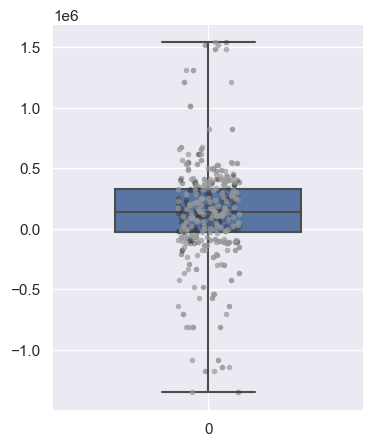

In [933]:
f, ax = plt.subplots(figsize=(4, 5))

sns.boxplot(data=df_sort_dup.price_diff,
            whis=[0, 100], width=.6)

# Add in points to show each observation
sns.stripplot(data=df_sort_dup, y = "price_diff",
              size=4, color=".2", alpha=0.4
              )

sns.stripplot(data=df_sort_dup, y = "price_diff",
              size=4, color=".6", alpha=0.7
              )

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


In [987]:
df_sort_dup.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sold_year', 'sold_month',
       'last_sold_price', 'last_sold_date', 'price_diff', 'time_diff',
       'month_sold1', 'month_sold2'],
      dtype='object')

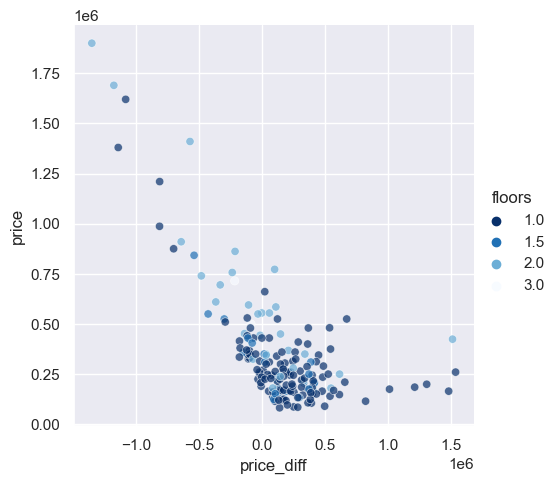

In [1026]:
# f, ax = plt.subplots(figsize=(8, 5))
# sns.color_palette("cubehelix", as_cmap=True)
sns.relplot(
            data=df_sort_dup, 
            x = 'price_diff', y="price",
            alpha=.7,
            hue='floors',
            palette='Blues_r'
            )

- Houses with more than 3.2 bathrooms are over priced
- Houses more than 4800 sqft are over priced -> risk to loose money
- House more than 3 floors
- more than 3-4 viewers
- buying price more than 60,000 have risk to loose money. -> our plan could work
- buying price lower than 25,000 have profit potential.

## Hypothesis2: houses which are much larger than the neighbourhood is more expensive

## Hypothesis 3: Houses with large basement area are more expensive

# The Task
- **AT LEAST 3 recommendations** for your stakeholder.

Dataset: 
- choose the zip code area with the lower housing price (mean)

In [937]:
### Plotly to plot geo plot
import plotly.graph_objects as go

fig = px.scatter_mapbox(
                        df_chp_area, lat="lat", lon="long",
                        hover_name="price", hover_data=["sqft_living", "grade"],
                        color=df_chp_area.price,
                        color_discrete_sequence=px.colors.qualitative.G10,
                        zoom=8.5, width=650, height=400, 
                        opacity=0.6
                        )

# fig.update_traces(name={'House Distribution', 'test'})
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Insights

### Insights 1
There are certain month the real estate market is especially active, summer?

### Insights 2
when to buy the house

### Insights 3
where to buy

### Insights 4
What to look for?

## Recommendations

## DO NOT
 buy area in zip code 98040 and 98039, almost all housing price are above median

In [905]:
zipcode_exp = df[~df.zipcode.isin(df_price50.zipcode.unique())].zipcode.unique()
df_p50_upper = df[df.zipcode.isin(zipcode_exp)]
df_p50_upper.price.describe()

count    3.320000e+02
mean     1.340420e+06
std      7.968667e+05
min      5.000000e+05
25%      8.500000e+05
50%      1.090000e+06
75%      1.580000e+06
max      6.890000e+06
Name: price, dtype: float64

In [906]:
import plotly.graph_objects as go

fig = px.scatter_mapbox(
                        df_p50_upper, lat="lat", lon="long",
                        hover_name="price", hover_data=["condition", "grade"],
                        color=df_p50_upper.price,
                        color_discrete_sequence=px.colors.qualitative.G10,
                        zoom=12, width=600, height=680, 
                        opacity=0.9
                        )

# fig.update_traces(name={'House Distribution', 'test'})
fig.update_layout(mapbox_style="carto-positron")
# fig.update_layout(mapbox_style="open-street-view")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()